In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("german_credit_data.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100 ## if the values are above 50% remove it

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [8]:
df[["Housing", "Saving accounts", "Checking account", "Purpose"]].nunique()

Housing             3
Saving accounts     4
Checking account    3
Purpose             8
dtype: int64

In [9]:
## data cleaning
df["Saving accounts"].mode() ## which is maximum repeting value

0    little
Name: Saving accounts, dtype: object

In [10]:
df["Saving accounts"] = df["Saving accounts"].fillna("little")

In [11]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [12]:
df["Checking account"].mode()

0    little
Name: Checking account, dtype: object

In [13]:
df["Checking account"] = df["Checking account"].fillna("little")

In [14]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,little,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


## data set shows usage of credit cards on Saving accounts vs 	Checking account	


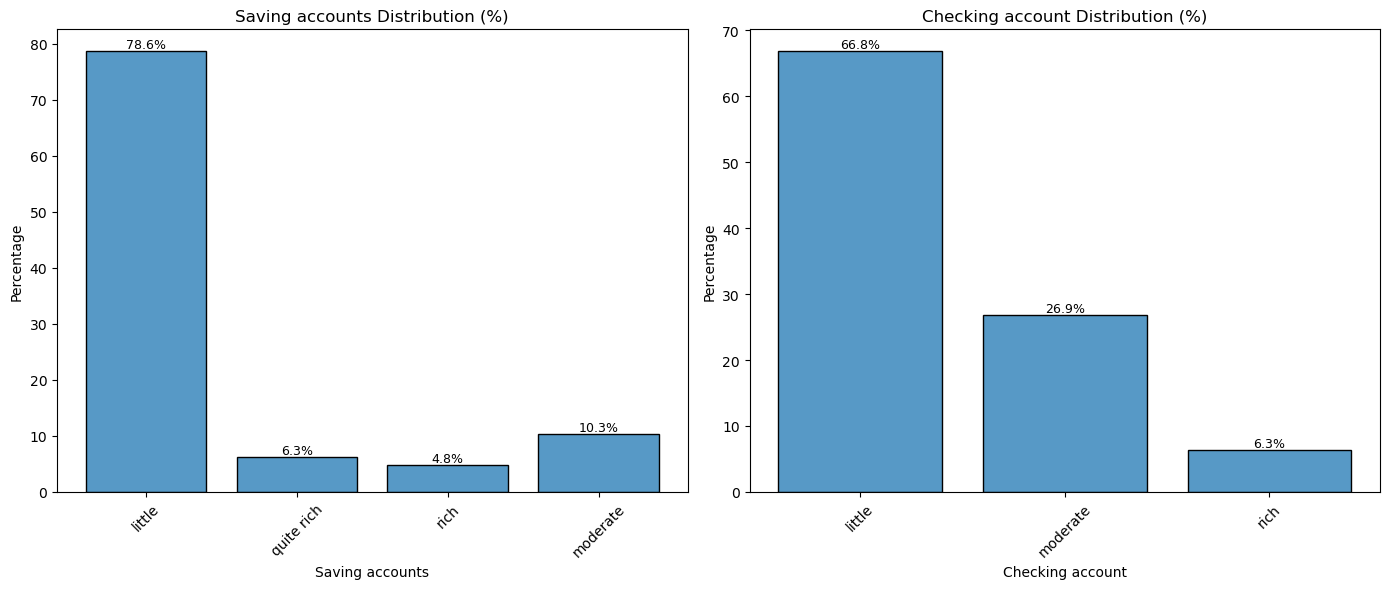

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot percentage histogram
def plot_percentage_hist(column, ax):
    total = len(df)
    order = df[column].value_counts().index  # Sort bars by frequency
    sns.histplot(
        data=df,
        x=column,
        stat="percent",   # Show percentage
        discrete=True,    # Treat categories as discrete
        shrink=0.8,
        ax=ax
    )
    ax.set_title(f"{column} Distribution (%)")
    ax.set_ylabel("Percentage")
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    
    # Add percentage labels on bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height:.1f}%", 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9)

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_percentage_hist("Saving accounts", axes[0])
plot_percentage_hist("Checking account", axes[1])

plt.tight_layout()
plt.show()

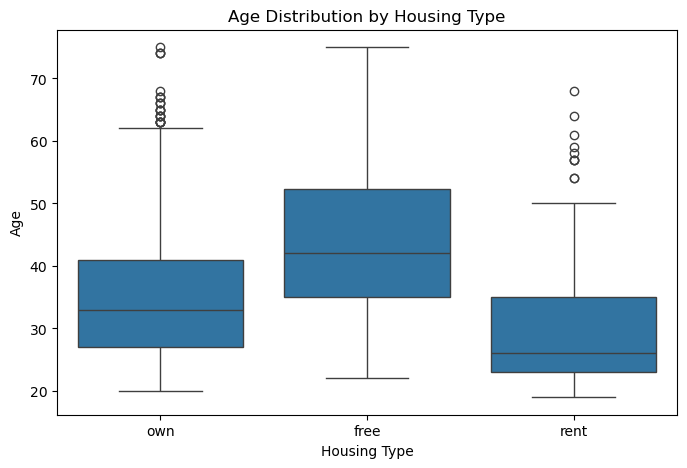

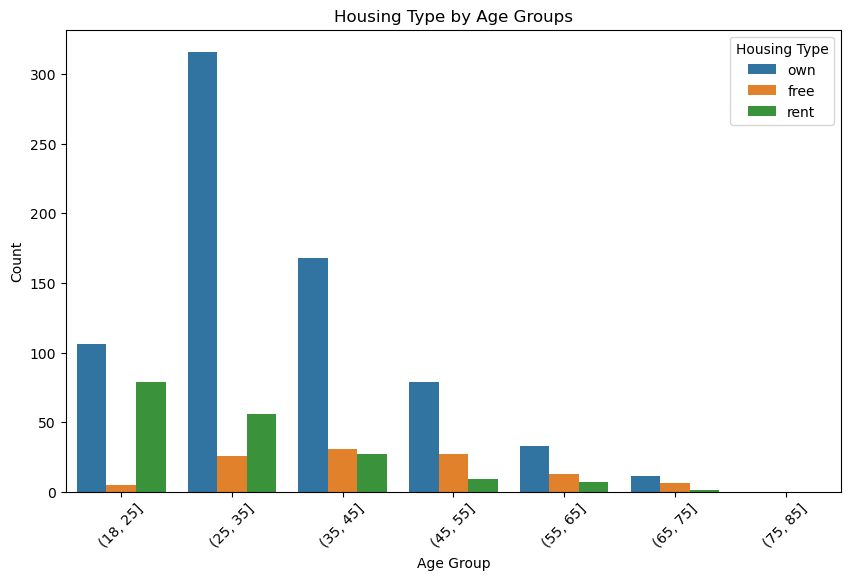

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Boxplot (Age distribution per Housing type)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Housing", y="Age", order=["own", "free", "rent"])
plt.title("Age Distribution by Housing Type")
plt.xlabel("Housing Type")
plt.ylabel("Age")
plt.show()

# Plot 2: Countplot (Age vs Housing, in age bins)
plt.figure(figsize=(10, 6))
age_bins = pd.cut(df["Age"], bins=[18, 25, 35, 45, 55, 65, 75, 85])
sns.countplot(data=df, x=age_bins, hue="Housing", hue_order=["own", "free", "rent"])
plt.title("Housing Type by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Housing Type")
plt.show()

In [17]:
df["Housing"].count

<bound method Series.count of 0       own
1       own
2       own
3      free
4      free
       ... 
995     own
996     own
997     own
998    free
999     own
Name: Housing, Length: 1000, dtype: object>

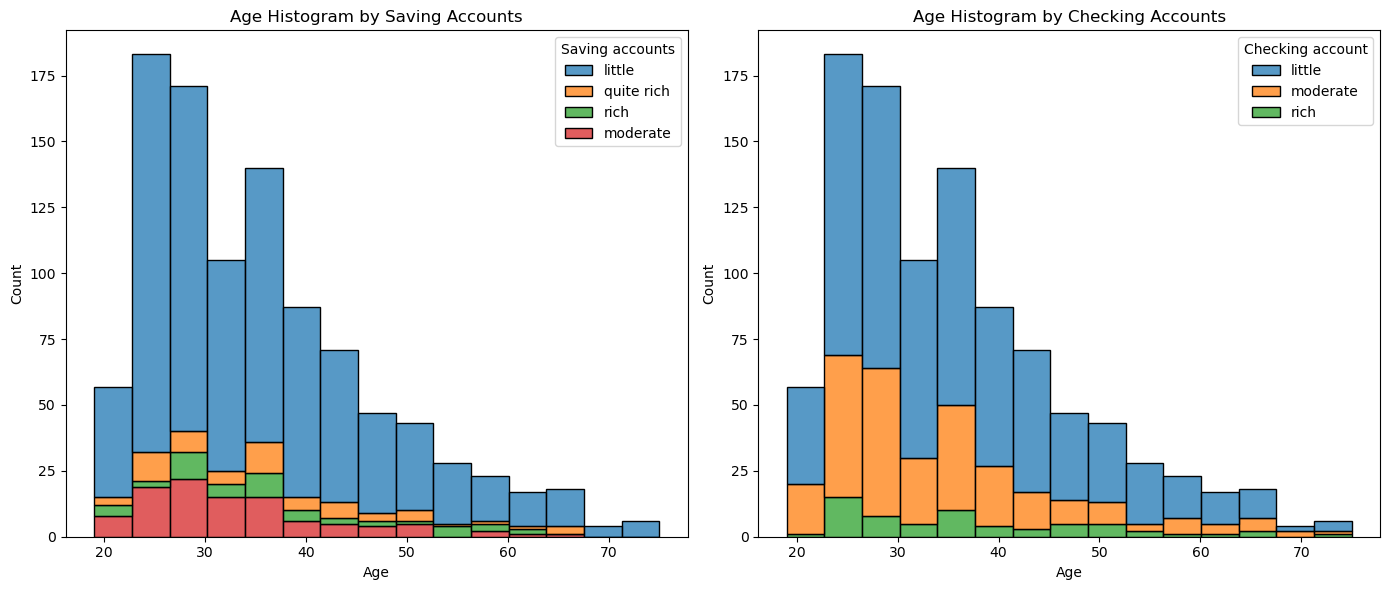

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Saving accounts"] = df["Saving accounts"].fillna("little")
df["Checking account"] = df["Checking account"].fillna("little")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram: Age distribution by Saving accounts
sns.histplot(
    data=df,
    x="Age",
    hue="Saving accounts",
    multiple="stack",
    bins=15,
    ax=axes[0]
)
axes[0].set_title("Age Histogram by Saving Accounts")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Histogram: Age distribution by Checking accounts
sns.histplot(
    data=df,
    x="Age",
    hue="Checking account",
    multiple="stack",
    bins=15,
    ax=axes[1]
)
axes[1].set_title("Age Histogram by Checking Accounts")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

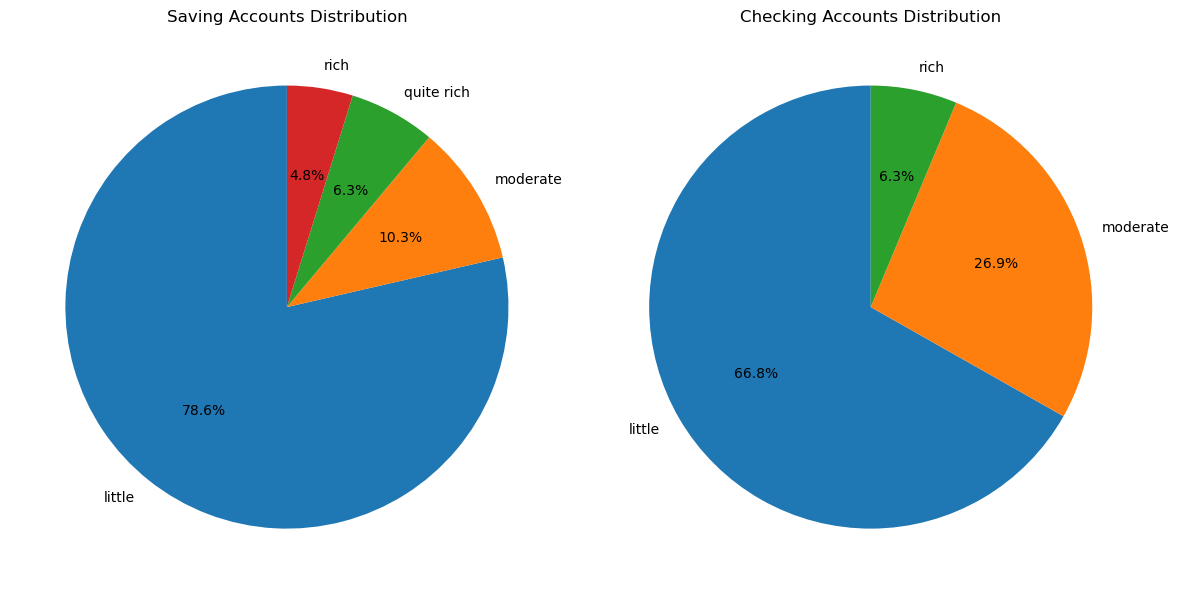

In [19]:
import matplotlib.pyplot as plt

# Fill NaN values
df["Saving accounts"] = df["Saving accounts"].fillna("little")
df["Checking account"] = df["Checking account"].fillna("little")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Saving accounts
saving_counts = df["Saving accounts"].value_counts()
axes[0].pie(
    saving_counts,
    labels=saving_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Saving Accounts Distribution")

# Pie chart for Checking accounts
checking_counts = df["Checking account"].value_counts()
axes[1].pie(
    checking_counts,
    labels=checking_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Checking Accounts Distribution")

plt.tight_layout()
plt.show()

In [20]:
df["Purpose"].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

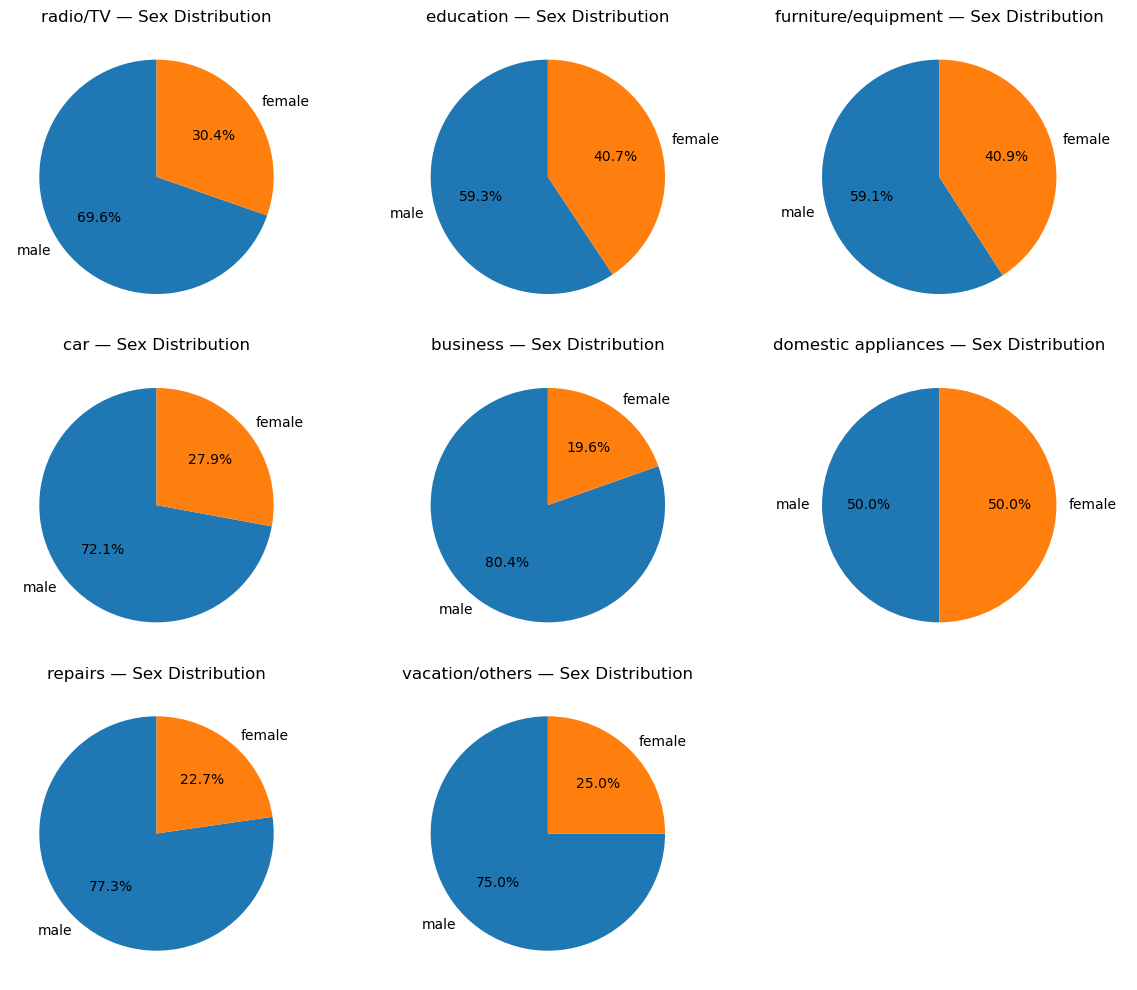

In [21]:
import matplotlib.pyplot as plt

# Get unique purposes
purposes = df["Purpose"].unique()

# Create subplots (rows x cols)
fig, axes = plt.subplots(nrows=len(purposes)//3 + 1, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Loop through purposes and plot a pie for each
for i, purpose in enumerate(purposes):
    purpose_data = df[df["Purpose"] == purpose]["Sex"].value_counts()
    axes[i].pie(
        purpose_data,
        labels=purpose_data.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f"{purpose} — Sex Distribution")

# Remove empty plots if purposes < total subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [22]:
X=df[[	"Age","Sex","Housing","Saving accounts","Checking account","Duration","Purpose"	]]	
y=df["Credit amount"]

In [23]:
type(X)

pandas.core.frame.DataFrame

## one hot Encoding

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd




# ----------------------
# Features & Target
# ----------------------
X = df[["Age", "Sex", "Housing", "Saving accounts", "Checking account", "Duration", "Purpose"]]
y = df["Credit amount"]

X.loc[:, "Saving accounts"] = X["Saving accounts"].fillna("little")
X.loc[:, "Checking account"] = X["Checking account"].fillna("little")


# Convert Credit amount to categories (Low / Medium / High)
y = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# One-Hot Encoding for Categorical Features
# ----------------------
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# ----------------------
# Models
# ----------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# ----------------------
# Train & Evaluate
# ----------------------
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.62
Confusion Matrix:
 [[50  8  9]
 [12 47  8]
 [23 16 27]]
Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.75      0.66        67
         Low       0.66      0.70      0.68        67
      Medium       0.61      0.41      0.49        66

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.62      0.62      0.61       200


--- Decision Tree ---
Accuracy: 0.54
Confusion Matrix:
 [[46  9 12]
 [ 8 42 17]
 [27 19 20]]
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.69      0.62        67
         Low       0.60      0.63      0.61        67
      Medium       0.41      0.30      0.35        66

    accuracy                           0.54       200
   macro avg       0.53      0.54      0.53       200
weighted avg       0.53      0.54      0.53       2

/var/folders/zv/bp9ddvy90gb26t2tckrp75zr0000gn/T/ipykernel_8154/3018192504.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x="CreditCategory", order=["Low", "Medium", "High"], palette="Set2")


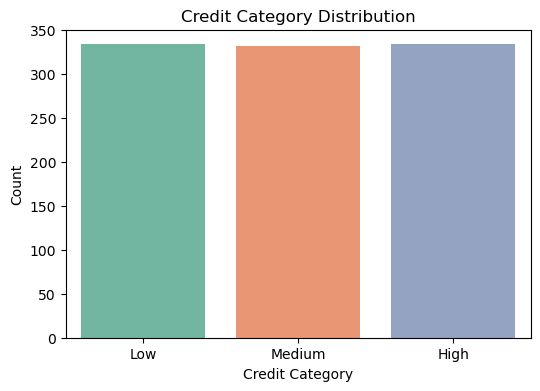

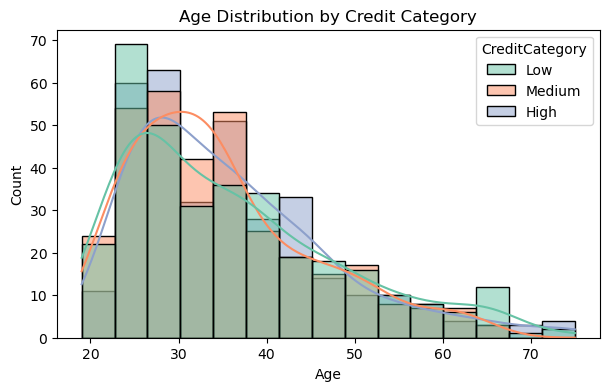

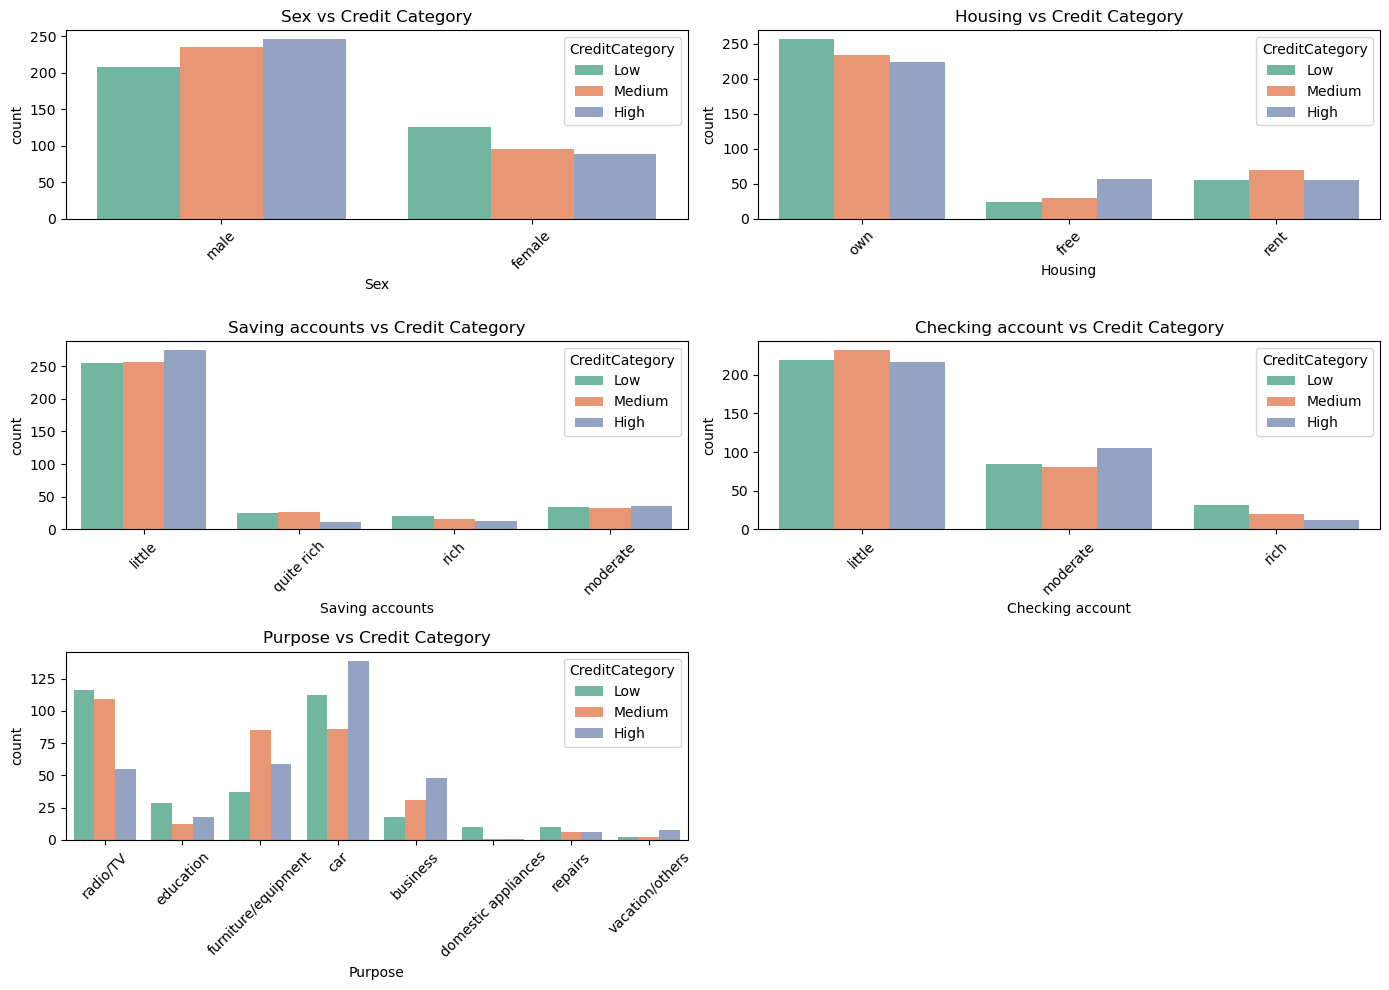

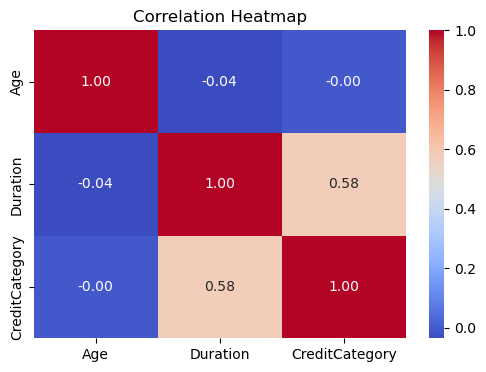

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Make a safe copy ---
X = df[["Age", "Sex", "Housing", "Saving accounts", "Checking account", "Duration", "Purpose"]].copy()
X["Saving accounts"] = X["Saving accounts"].fillna("little")
X["Checking account"] = X["Checking account"].fillna("little")

# --- Target variable as categories ---
y = pd.qcut(df["Credit amount"], q=3, labels=["Low", "Medium", "High"])
X["CreditCategory"] = y

# -----------------------
# 1. Credit Category Distribution
# -----------------------
plt.figure(figsize=(6, 4))
sns.countplot(data=X, x="CreditCategory", order=["Low", "Medium", "High"], palette="Set2")
plt.title("Credit Category Distribution")
plt.xlabel("Credit Category")
plt.ylabel("Count")
plt.show()

# -----------------------
# 2. Age Distribution by Credit Category
# -----------------------
plt.figure(figsize=(7, 4))
sns.histplot(data=X, x="Age", hue="CreditCategory", kde=True, palette="Set2", bins=15)
plt.title("Age Distribution by Credit Category")
plt.show()

# -----------------------
# 3. Categorical features vs Credit Category
# -----------------------
categorical_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=X, x=col, hue="CreditCategory", ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} vs Credit Category")
    axes[i].tick_params(axis='x', rotation=45)

# Remove last empty plot if number of plots < grid
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# -----------------------
# 4. Correlation Heatmap (Numeric Features Only)
# -----------------------
numeric_cols = ["Age", "Duration", "CreditCategory"]
temp_df = X.copy()
temp_df["CreditCategory"] = temp_df["CreditCategory"].cat.codes  

plt.figure(figsize=(6, 4))
sns.heatmap(temp_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()